# Machine Learning
# Haberman

## importing relavant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Loading dataset

In [2]:
import pandas as pd

dataset = "haberman.csv"
nam = ['age_patient_operate_time', 'year_operate_time', 'axillary_node_num', 'survive_status']
myData = pd.read_csv(dataset, names=nam)
myData

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [3]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age_patient_operate_time  306 non-null    int64
 1   year_operate_time         306 non-null    int64
 2   axillary_node_num         306 non-null    int64
 3   survive_status            306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## Missing values

In [4]:
import numpy as np

myData.isna().sum()

age_patient_operate_time    0
year_operate_time           0
axillary_node_num           0
survive_status              0
dtype: int64

## Visualization 

### Pie chart to show the percentage of survival 

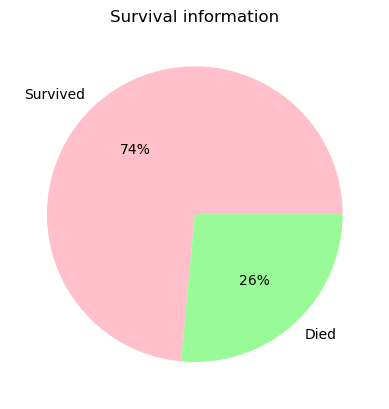

In [19]:
import matplotlib.pyplot as plt

sur = myData["survive_status"].value_counts()

plt.pie(x=sur, labels=["Survived", "Died"], colors=["#FFC0CB", "#98FB98"], autopct="%1.0f%%")
plt.title("Survival information")

plt.show()

In [20]:
# Count the number of data points for each class.
# This dataset is imbalanced, with significantly different data point counts for each class.
# Strategies for handling imbalanced data will be explored later.
myData.survive_status.value_counts()

survive_status
1    225
2     81
Name: count, dtype: int64

### Scatter plot to visualize the age distribution


Youngest patient was 30 old.
Oldest patient was 83 old.
Mean of the ages in patients was 52.5 years.


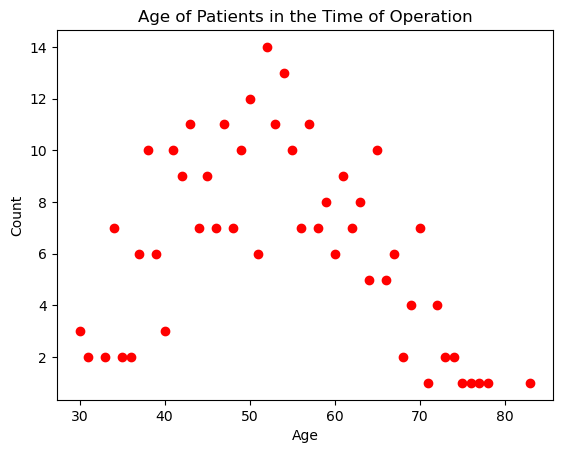

In [17]:
age = myData["age_patient_operate_time"].value_counts().sort_index()

# Extract ages (x-axis) and counts (y-axis)
ages = age.index
counts = age.values

# Create a scatter plot
plt.scatter(ages, counts, color="red")  # You can adjust the color as needed
plt.title("Age of Patients in the Time of Operation")
plt.xlabel("Age")
plt.ylabel("Count")


print(f"Youngest patient was {myData['age_patient_operate_time'].min()} old.")
print(f"Oldest patient was {myData['age_patient_operate_time'].max()} old.")
print(f"Mean of the ages in patients was {myData['age_patient_operate_time'].mean():.1f} years.")

plt.show()

In [18]:
myData.describe()

,age_patient_operate_time,year_operate_time,axillary_node_num,survive_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000
